# **Breast Cancer Wisconsin Diagnostic**

# **Introduction**

Detection of breast cancer is the preliminary phase in cancer diagnosis. So, classifiers with higher accuracy are always desired. A classifier with high accuracy offers very less chance to wrongly classify a patient of cancer. 

Breast cancer refers to cancer from a malignant tumor in the cells of the breast tissue. A malignant tumor is a group of cancer cells that can grow into surrounding tissues or spread to distant areas of the body. Breast cancer is uncontrolled multiplication of cells in breast tissue. A group of rapidly dividing cells may form a lump or architectural distortions. 

There are two main classifications of tumors. One is known as **benign** and the other as **malignant**. A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

**Benign** tumors are **non-malignant/non-cancerous tumor**. A benign tumor is usually localized, and does not spread to other parts of the body.  **Malignant** tumors are **cancerous** growths. They are often resistant to treatment, may spread to other parts of the body and they sometimes recur after they were removed.

There are two aspects of diagnosis of cancerous cells while doing testing.  A **false-positive** test occurs when test results appear to be abnormal, even though there is actually no cancer. A **false-negative** is when test results show no cancer when there really is cancer.

No test is perfect: a perfect test would give only **true positive** and **true negative** results, but a good screening test should have a low rate of **false-positive** and **false-negative** results. **False-positive** results can create undue stress, anxiety, and can lead to other unnecessary testing. **False-negative** results can delay treatment. I feel that **false-negative is more dangerous** in case of cancer detection, because patient think that he do not have cancer and therefore he will not take any precation and medical treatment. Although cancerous cells keep growing inside and can lead to next phase of cancer. When again patient starting feel uncomfortable, then he may go for another round of testing, but by that time it may be too late to cure the cancer.

So, in this case we have emphasis more on find accurate false-negative rather than the accuracy rate.

Let's explore a classification task with **Keras API for TF 2.0 with Early Stopping and Dropout Layer**.


# **Load the data**

## Import libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib
import tensorflow as tf

# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Matplotlib version : Matplotlib {matplotlib.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"Tensorflow version : Tensorflow {tf.__version__}")

#Magic function to display In-Notebook display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='Set2')

Numpy version : Numpy 1.19.2
Pandas version : Pandas 1.1.3
Matplotlib version : Matplotlib 3.3.2
Seaborn version : Seaborn 0.11.0
Tensorflow version : Tensorflow 2.2.0


## Import dataset

In [2]:
# df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv', encoding = 'latin-1')
df = pd.read_csv('Breast_Cancer_Wisconsin.csv', encoding = 'latin-1')

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001
diagnosis,M,M,M,M,M,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13,12.46
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2,87.5,83.97
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9,519.8,475.9
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543


# **Exploratory Data Analysis**

Once the data is read into python, we need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few colums or rows, joining some other data, and handling qualitative variables like dates.

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Attribute Information:**

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign) 

Attribute 3-32:

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The **mean**, **standard error (se)** and **worst** or **largest** (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

**diagnosis**: (Wisconsin Diagnostic Breast Cancer - WDBC)
* WDBC-Malignant
* WDBC-Benign

## Checking concise summary of dataset

It is also a good practice to know the features and their corresponding data types,along with finding whether they contain null values or not.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observations**
* Dataset contains details of 569 transactions with 33 features.
* Data has float, integer, and object/String type values.
* Diagnosis is string haing values M and B (M = malignant, B = benign).
* Every feature has 569 values, so there is no missing values in the form of NaN or NA.
* There is feature with name "Unnamed" with NAN values.
* All data types are float64 ,except 1 : diagnosis 
* Memory Usage : 147KB only, not so Harsh !!

## Delete unwanted columns

Id and the column 'Unnamed: 32' is not useful for data analysis, so lets remove them first.

In [6]:
df.drop(['id','Unnamed: 32'],axis=1, inplace=True)

In [7]:
df.head().T

,0,1,2,3,4
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809


## Generate descriptive statistics

Lets summarize the central tendency, dispersion and shape of a dataset's distribution.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**Observations**
* area_mean, perimeter_se, area_se, area_worst are highly positive skewed.

## Malignant and Benign Distribution

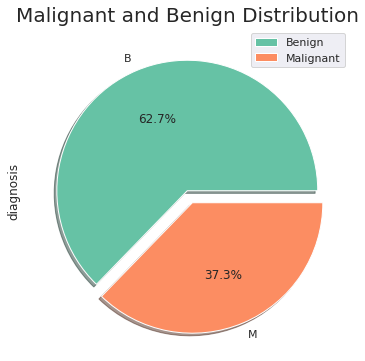

In [9]:
df["diagnosis"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Malignant and Benign Distribution",fontsize=20)
plt.legend(["Benign", "Malignant"])
plt.show()

In [10]:
print(df['diagnosis'].value_counts())
print('\n')
print(df['diagnosis'].value_counts(normalize=True))

B    357
M    212
Name: diagnosis, dtype: int64


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


**Observations**

This dataset contain about 37% cancerous Malignant cells and about 62.7% Bening non cancerous cells.

## Histogram of Radius Mean for Bening and Malignant Tumors

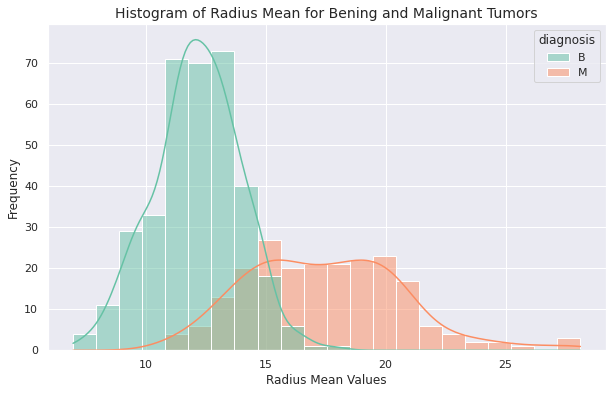

In [11]:
plt.figure(figsize=(10,6))
hue_order = ['B', 'M']
sns.histplot(df,x="radius_mean",hue='diagnosis',kde=True, hue_order=hue_order) 

plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors", fontsize=14)

plt.show()

In [12]:
# most_frequent_bening_radius_mean
df[df["diagnosis"] == 'B']['radius_mean'].value_counts().idxmax()

11.06

In [13]:
# most_frequent_malignant_radius_mean
df[df["diagnosis"] == 'M']['radius_mean'].value_counts().idxmax()

15.46

**Observations**

* From this graph you can see that radius mean of malignant tumors are bigger than radius mean of bening tumors mostly.
* The bening distribution (green in graph) is approcimately bell-shaped that is shape of normal distribution (gaussian distribution)
* Also you can find result like that most frequent malignant radius mean is 15.46 and most frequent bening radius mean is 11.06.

## Distribution of other features

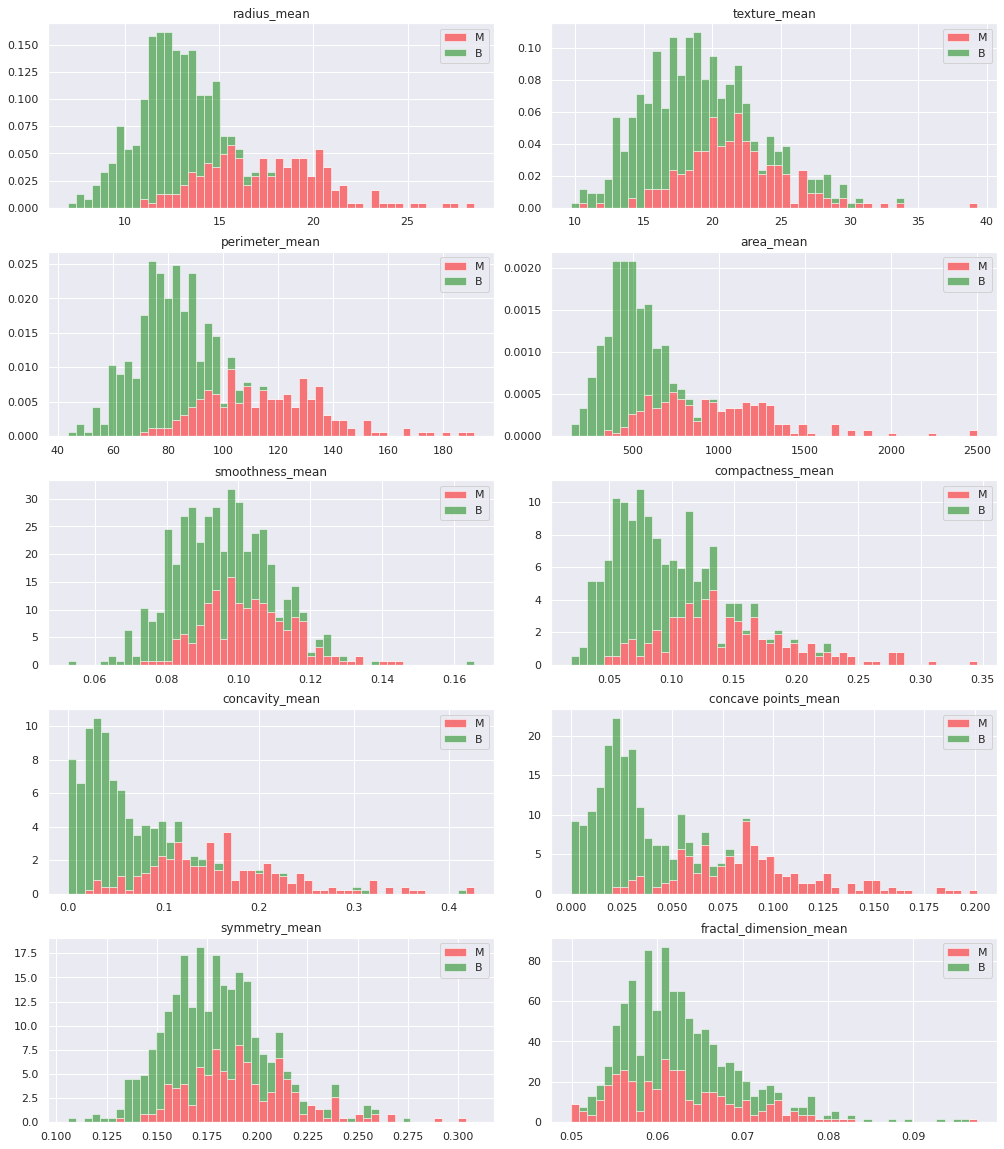

In [14]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] == 'M']
dfB=df[df['diagnosis'] == 'B']

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,16))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], 
            bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , 
            alpha=0.5,
            stacked=True, 
            density = True, 
            label=['M','B'],
            color=['r','g'])
    
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

**Observations**
* Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

* Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

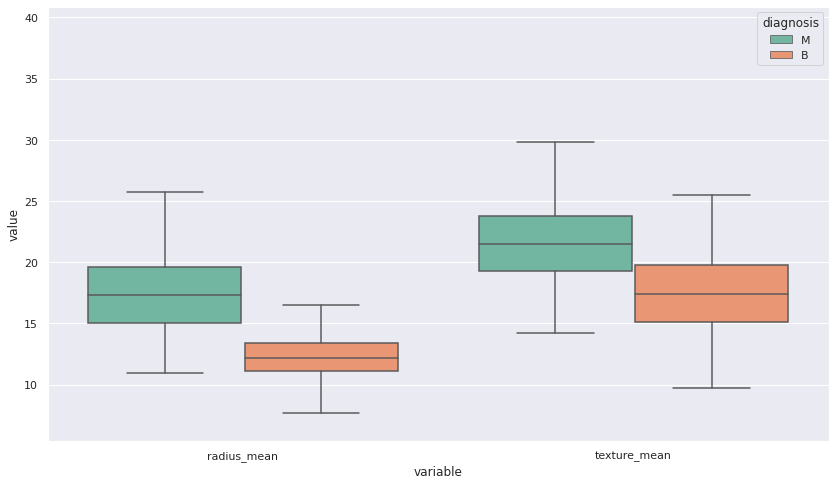

In [15]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])

plt.figure(figsize = (14,8))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data, fliersize=0)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
# plt.legend(["Benign", "Malignant"])
plt.show()

**Observations**

* radius_mean and texture_mean are higher for Malignant cells. It means cancerous cells have higher (about radius_mean = 17.5 & texture_mean = 22) values of radius_mean and texture_mean as compared to non-cancerous cells.

## Relationship between more than 2 distribution

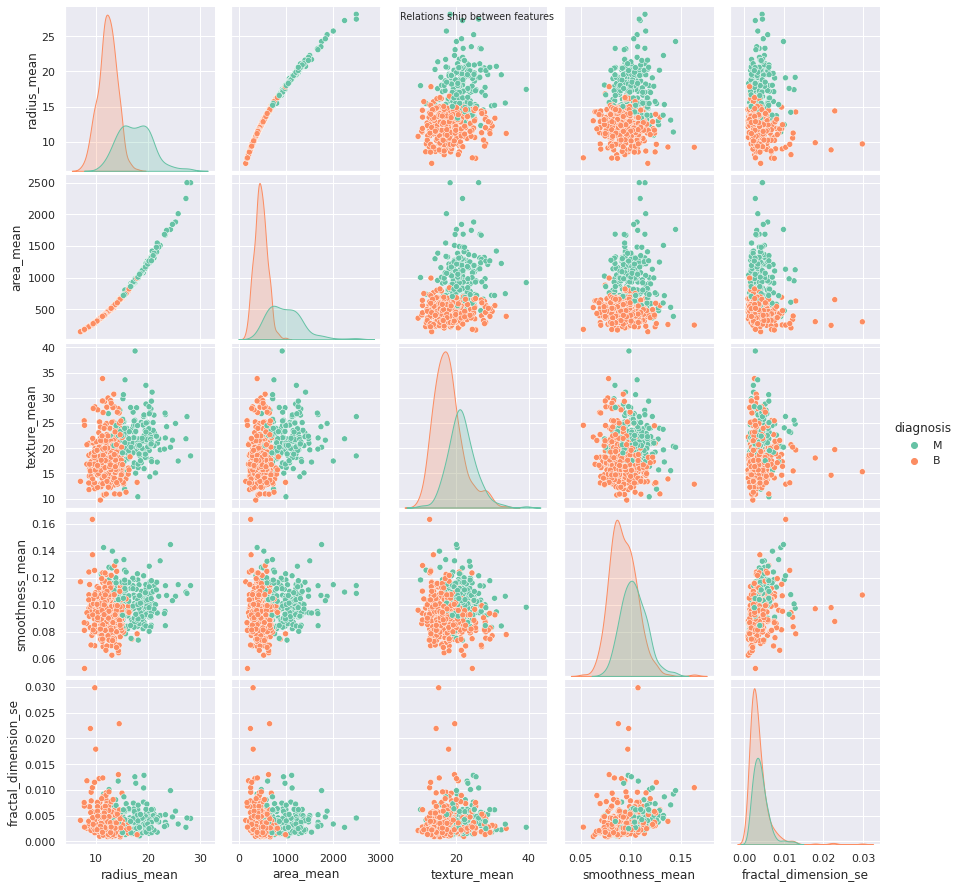

In [16]:
# Also we can look relationship between more than 2 distribution
# sns.set(style = "white")

sns.pairplot(df, vars=["radius_mean","area_mean","texture_mean",'smoothness_mean',"fractal_dimension_se"], hue='diagnosis')
plt.suptitle('Relations ship between features');
plt.show()

**Observations**

* All expect area_mean are more or less have bell shape curves. It means they have normal distribution.

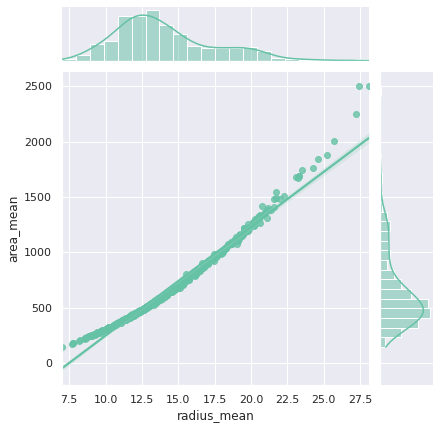

In [17]:
sns.jointplot(data=df, x='radius_mean', y='area_mean', kind="reg")
plt.show()

## Correlation Among Explanatory Variables

Having **too many features** in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, **if a feature does not improve your model a lot, not adding it may be a better choice.**

Another important thing is **correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting.** However, this does not mean that you must remove one of the highly correlated features. 

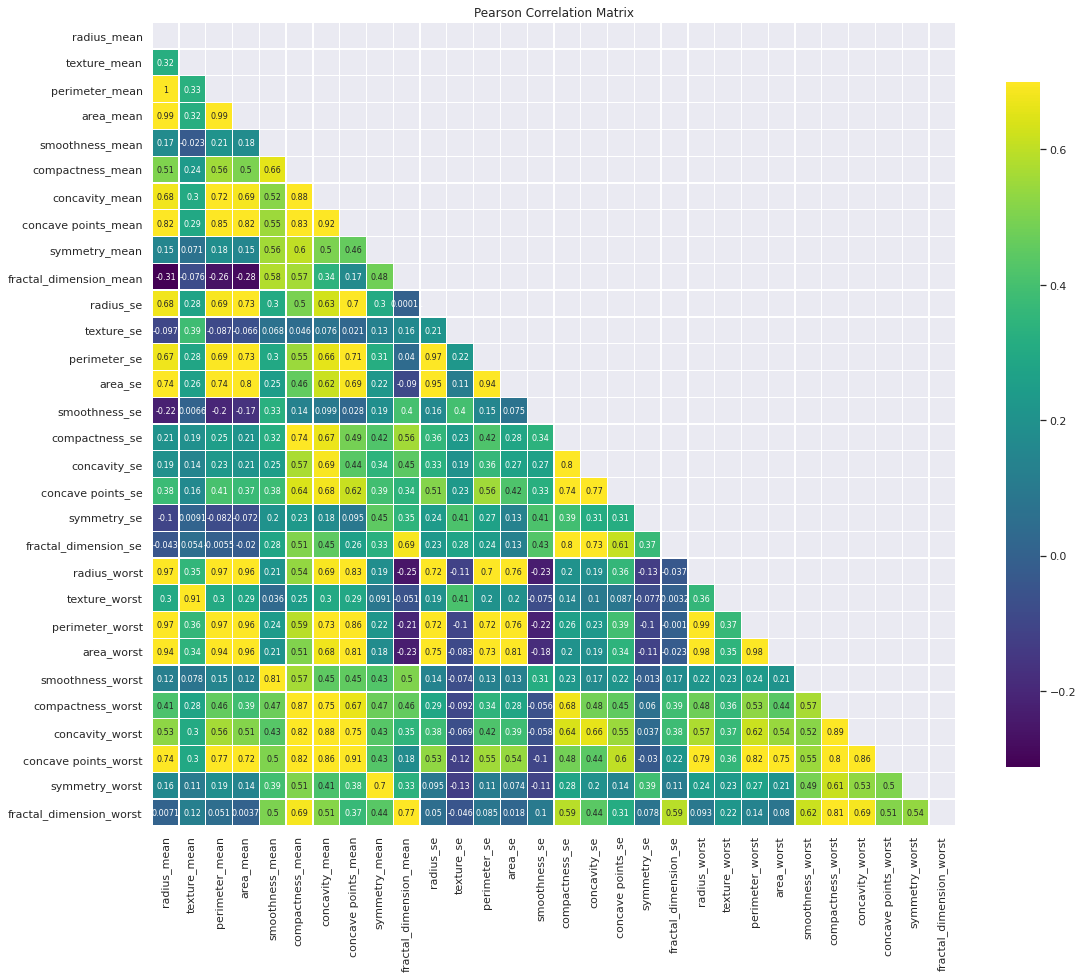

In [18]:
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation Matrix')
# Generating correlation
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask = mask,linewidths=0.25,vmax=0.7,square=True,cmap="viridis",linecolor='w',annot=True,cbar_kws={"shrink": .7});
plt.show()

## Reset the index

In [19]:
df.reset_index(inplace = True , drop = True)

# **Splitting data into Training and Testing samples**

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [20]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
df['diagnosis'] = df['diagnosis'].map({'M': 1,'B': 0})

In [22]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## so 1 represents M and 0 represts B.

In [23]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y,random_state=101)

In [26]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (426, 30)
y_train -  (426,)
X_test -  (143, 30)
y_test -  (143,)


# **Scale Amount Feature**

* It is good idea to scale the data, so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like salary has range from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
* This will result in a better prediction model.


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

# from keras.models import Sequential
# from keras.layers import Dense, Activation,Dropout

In [32]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# **Training the Model**

 

# Example One: Choosing too many epochs and overfitting!

In [33]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test, y_test), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 56ms/step - loss: 0.6670 - val_loss: 0.6448
Epoch 2/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6224 - val_loss: 0.6069
Epoch 3/600
14/14 [==============================] - 0s 24ms/step - loss: 0.5808 - val_loss: 0.5663
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5332 - val_loss: 0.5186
Epoch 5/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4784 - val_loss: 0.4696
Epoch 6/600
14/14 [==============================] - 0s 17ms/step - loss: 0.4235 - val_loss: 0.4265
Epoch 7/600
14/14 [==============================] - 0s 22ms/step - loss: 0.3759 - val_loss: 0.3865
Epoch 8/600
14/14 [==============================] - 0s 20ms/step - loss: 0.3335 - val_loss: 0.3523
Epoch 9/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2987 - val_loss: 0.3254
Epoch 10/600
14/14 [==============================] - 0s 23ms/step - loss: 0.2667 - val_loss: 0.3034

Epoch 82/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0478 - val_loss: 0.1313
Epoch 83/600
14/14 [==============================] - 0s 26ms/step - loss: 0.0480 - val_loss: 0.1362
Epoch 84/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0481 - val_loss: 0.1329
Epoch 85/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0469 - val_loss: 0.1328
Epoch 86/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0451 - val_loss: 0.1356
Epoch 87/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0439 - val_loss: 0.1323
Epoch 88/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0447 - val_loss: 0.1345
Epoch 89/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0438 - val_loss: 0.1353
Epoch 90/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0443 - val_loss: 0.1345
Epoch 91/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0476 - val_los

14/14 [==============================] - 0s 19ms/step - loss: 0.0308 - val_loss: 0.1651
Epoch 163/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0322 - val_loss: 0.1671
Epoch 164/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0330 - val_loss: 0.1635
Epoch 165/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0282 - val_loss: 0.1652
Epoch 166/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0264 - val_loss: 0.1749
Epoch 167/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0273 - val_loss: 0.1681
Epoch 168/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0271 - val_loss: 0.1677
Epoch 169/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0275 - val_loss: 0.1682
Epoch 170/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0287 - val_loss: 0.1706
Epoch 171/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0268 - val_loss: 0

14/14 [==============================] - 0s 17ms/step - loss: 0.0181 - val_loss: 0.2056
Epoch 243/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0181 - val_loss: 0.1981
Epoch 244/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0176 - val_loss: 0.2031
Epoch 245/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0177 - val_loss: 0.2034
Epoch 246/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0177 - val_loss: 0.1983
Epoch 247/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0219 - val_loss: 0.2109
Epoch 248/600
14/14 [==============================] - 0s 26ms/step - loss: 0.0178 - val_loss: 0.2030
Epoch 249/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0175 - val_loss: 0.2082
Epoch 250/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0176 - val_loss: 0.2005
Epoch 251/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0176 - val_loss: 0

14/14 [==============================] - 0s 28ms/step - loss: 0.0112 - val_loss: 0.2486
Epoch 323/600
14/14 [==============================] - 0s 27ms/step - loss: 0.0123 - val_loss: 0.2590
Epoch 324/600
14/14 [==============================] - 0s 26ms/step - loss: 0.0123 - val_loss: 0.2471
Epoch 325/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0143 - val_loss: 0.2479
Epoch 326/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.2562
Epoch 327/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0130 - val_loss: 0.2461
Epoch 328/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0130 - val_loss: 0.2730
Epoch 329/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0124 - val_loss: 0.2505
Epoch 330/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0120 - val_loss: 0.2617
Epoch 331/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0111 - val_loss: 0

14/14 [==============================] - 0s 27ms/step - loss: 0.0076 - val_loss: 0.2846
Epoch 403/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0087 - val_loss: 0.2974
Epoch 404/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0082 - val_loss: 0.2935
Epoch 405/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0069 - val_loss: 0.2887
Epoch 406/600
14/14 [==============================] - 0s 26ms/step - loss: 0.0066 - val_loss: 0.2932
Epoch 407/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0071 - val_loss: 0.2921
Epoch 408/600
14/14 [==============================] - 0s 23ms/step - loss: 0.0068 - val_loss: 0.2893
Epoch 409/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0064 - val_loss: 0.2915
Epoch 410/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0072 - val_loss: 0.2945
Epoch 411/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0064 - val_loss: 0

14/14 [==============================] - 0s 20ms/step - loss: 0.0048 - val_loss: 0.3217
Epoch 483/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0040 - val_loss: 0.3215
Epoch 484/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0042 - val_loss: 0.3218
Epoch 485/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0049 - val_loss: 0.3279
Epoch 486/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.3250
Epoch 487/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0045 - val_loss: 0.3240
Epoch 488/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0076 - val_loss: 0.3215
Epoch 489/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0058 - val_loss: 0.3428
Epoch 490/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0047 - val_loss: 0.3277
Epoch 491/600
14/14 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0

14/14 [==============================] - 0s 17ms/step - loss: 0.0028 - val_loss: 0.3469
Epoch 563/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0028 - val_loss: 0.3416
Epoch 564/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0025 - val_loss: 0.3503
Epoch 565/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0024 - val_loss: 0.3442
Epoch 566/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0028 - val_loss: 0.3526
Epoch 567/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0026 - val_loss: 0.3516
Epoch 568/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0026 - val_loss: 0.3472
Epoch 569/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 0.3488
Epoch 570/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0028 - val_loss: 0.3491
Epoch 571/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0031 - val_loss: 0

In [34]:
model_loss = pd.DataFrame(model.history.history)

<Figure size 864x576 with 0 Axes>

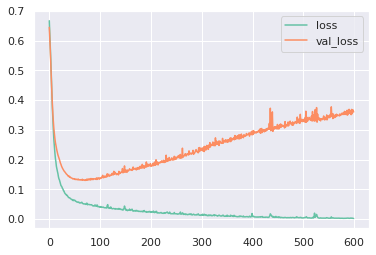

In [35]:
plt.figure(figsize=(12,8))
model_loss.plot()
plt.show()

# Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

### Early stopping:
**Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.**

> More at : https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [36]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

**Stop training when a monitored quantity has stopped improving.**

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [39]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 45ms/step - loss: 0.6944 - val_loss: 0.6747
Epoch 2/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6584 - val_loss: 0.6416
Epoch 3/600
14/14 [==============================] - 0s 29ms/step - loss: 0.6145 - val_loss: 0.6030
Epoch 4/600
14/14 [==============================] - 0s 28ms/step - loss: 0.5731 - val_loss: 0.5683
Epoch 5/600
14/14 [==============================] - 0s 32ms/step - loss: 0.5315 - val_loss: 0.5314
Epoch 6/600
14/14 [==============================] - 0s 26ms/step - loss: 0.4879 - val_loss: 0.4927
Epoch 7/600
14/14 [==============================] - 0s 22ms/step - loss: 0.4447 - val_loss: 0.4548
Epoch 8/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4027 - val_loss: 0.4203
Epoch 9/600
14/14 [==============================] - 0s 21ms/step - loss: 0.3662 - val_loss: 0.3890
Epoch 10/600
14/14 [==============================] - 0s 19ms/step - loss: 0.3334 - val_loss: 0.3629

Epoch 82/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0508 - val_loss: 0.1202
Epoch 83/600
14/14 [==============================] - 0s 27ms/step - loss: 0.0515 - val_loss: 0.1242
Epoch 84/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0494 - val_loss: 0.1181
Epoch 85/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0526 - val_loss: 0.1270
Epoch 86/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0486 - val_loss: 0.1173
Epoch 87/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0500 - val_loss: 0.1222
Epoch 88/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0484 - val_loss: 0.1231
Epoch 89/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0494 - val_loss: 0.1196
Epoch 90/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0510 - val_loss: 0.1248
Epoch 91/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0495 - val_los

<AxesSubplot:>

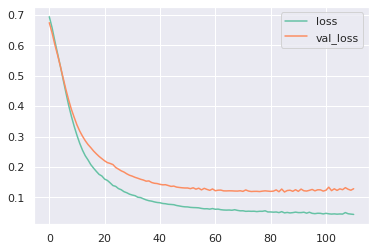

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Example Three: Adding in DropOut Layers

### Dropout Layers
**Dropout is a regularization technique for neural network models. So in this technique randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

More at : https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras

In [41]:
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 39ms/step - loss: 0.7027 - val_loss: 0.6914
Epoch 2/600
14/14 [==============================] - 0s 24ms/step - loss: 0.6907 - val_loss: 0.6760
Epoch 3/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6692 - val_loss: 0.6586
Epoch 4/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6621 - val_loss: 0.6403
Epoch 5/600
14/14 [==============================] - 0s 25ms/step - loss: 0.6365 - val_loss: 0.6207
Epoch 6/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6335 - val_loss: 0.6047
Epoch 7/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6190 - val_loss: 0.5858
Epoch 8/600
14/14 [==============================] - 0s 21ms/step - loss: 0.5816 - val_loss: 0.5642
Epoch 9/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5651 - val_loss: 0.5404
Epoch 10/600
14/14 [==============================] - 0s 21ms/step - loss: 0.5437 - val_loss: 0.5117

14/14 [==============================] - 0s 23ms/step - loss: 0.1171 - val_loss: 0.1293
Epoch 83/600
14/14 [==============================] - 0s 17ms/step - loss: 0.1153 - val_loss: 0.1278
Epoch 84/600
14/14 [==============================] - 0s 19ms/step - loss: 0.1053 - val_loss: 0.1268
Epoch 85/600
14/14 [==============================] - 0s 18ms/step - loss: 0.1105 - val_loss: 0.1285
Epoch 86/600
14/14 [==============================] - 0s 19ms/step - loss: 0.1044 - val_loss: 0.1250
Epoch 87/600
14/14 [==============================] - 0s 24ms/step - loss: 0.0952 - val_loss: 0.1256
Epoch 88/600
14/14 [==============================] - 0s 15ms/step - loss: 0.1100 - val_loss: 0.1271
Epoch 89/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0939 - val_loss: 0.1252
Epoch 90/600
14/14 [==============================] - 0s 14ms/step - loss: 0.1126 - val_loss: 0.1280
Epoch 91/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0944 - val_loss: 0.1294
Epo

<AxesSubplot:>

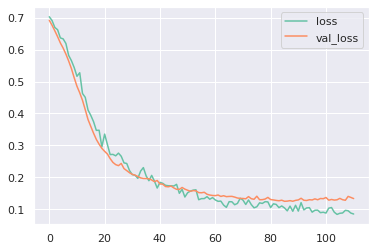

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# **Model Evaluation**

In [45]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
from sklearn import metrics

In [47]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.96      0.92      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [48]:
y_test_pred = y_test_pred.flatten()

## Confusion Matrix

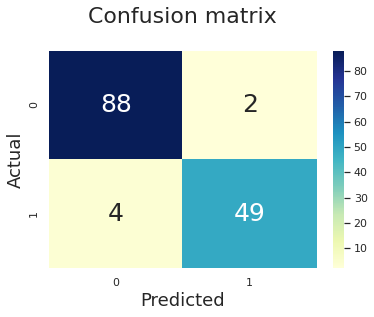

In [49]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)
plt.show()

## __Accuracy , Precision and Recall__


### __Accuracy__ : The most used and classic classification metric : Suited for binary classification problems.

$$  \text{Accuracy} = \frac{( TP + TN ) }{ (TP + TN + FP + FN )}$$

Basically Rightly predicted results amongst all the results , used when the classes are balanced

### __Precision__ : What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !

$$ \text{Precision} = \frac{( TP )}{( TP + FP )} $$

### __Sensitivity or Recall__ : What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible

$$ \text{Recall} = \frac{(TP)}{( TP + FN )} $$

### F1 Score : Harmonic mean of Precision and Recall. It basically maintains a balance between the precision and recall for your classifier

$$ F1 = \frac{2 * (\text{ precision } * \text{ recall })}{(\text{ precision } + \text{ recall } )} $$



There are two aspects of diagnosis of cancerous cells while doing testing.  A **false-positive** test occurs when test results appear to be abnormal, even though there is actually no cancer. A **false-negative** is when test results show no cancer when there really is cancer.

No test is perfect: a perfect test would give only **true positive** and **true negative** results, but a good screening test should have a low rate of **false-positive** and **false-negative** results. **False-positive** results can create undue stress, anxiety, and can lead to other unnecessary testing. **False-negative** results can delay treatment. I feel that **false-negative is more dangerous** in case of cancer detection, because patient think that he do not have cancer and therefore he will not take any precation and medical treatment. Although cancerous cells keep growing inside and can lead to next phase of cancer. When again patient starting feel uncomfortable, then he may go for another round of testing, but by that time it may be too late to cure the cancer.

So, in this case we have emphasis more on finding the 

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://kennis-research.shinyapps.io/Bayes-App/


In [50]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))

Accuracy of the model : 0.958


In [51]:
print("Count of Actual values of Test data :")
print(pd.Series(y_test).value_counts())

print("\n")

print("Count of Predected values of Test data :")
print(pd.Series(y_test_pred).value_counts())

Count of Actual values of Test data :
0    90
1    53
dtype: int64


Count of Predected values of Test data :
0    92
1    51
dtype: int64


In [52]:
# draw confusion matrix
metrics.confusion_matrix(y_test , y_test_pred)

array([[88,  2],
       [ 4, 49]])

### Real Accuracy 

In [53]:
49/53

0.9245283018867925

In [54]:
metrics.recall_score(y_test, y_test_pred)
# print(metrics.classification_report(y_test, y_test_pred))

0.9245283018867925

In [55]:
cnf_matrix[1][1]/pd.Series(y_test).value_counts()[1]

0.9245283018867925

### So 92.45% is our real accuracy.